In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import scipy

In [6]:
data = 'amazon_cells_labelled.txt'
amazon = pd.read_csv(data, delimiter='\t', header=None)
#positive column is binary (1 for True, 0 for False)
amazon.columns = ['review', 'positive']

In [55]:
#used some of the reviews here to choose some positive words
amazon.iloc[750:800]

,review,positive,good,great,impressed,recommend,excellent,works,good quality,high quality,...,highly,love,worth,fantastic,impressive,glad,really,definitely,no problem,no problems
750,"It is light, has plenty of battery capacity, a...",True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
751,disappointing.,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
752,Blue Ant is easy to use.,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
753,Cheap but hey it works.. Was pleasantly supris...,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
754,The camera on the phone may be used as a dustp...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
755,Then a few days later the a puff of smoke came...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
756,It's very convenient and simple to use - gets ...,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
757,The nano stated it.My son was dissapointed.,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
758,The sound quality is excellent as well.,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
759,Its the best headset I have used.,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
#built the keyword list from the dataset and online collections of positive words
#Tried and removed some words that were not present in the reviews
keywords = [
    'good',  
    'great', 
    'impressed', 
    'recommend', 
    'excellent',  
    'works', 
    'good quality', 
    'high quality',
    'satisfied', 
    'best', 
    'like',
    'happy', 
    'highly', 
    'love', 
    'worth', 
    'works', 
    'fantastic',  
    'impressive',
    'glad', 
    'really', 
    'definitely', 
    'no problem', 
    'no problems'
]

for key in keywords:
    amazon[str(key)] = amazon.review.str.contains(
        " " + str(key) + " ", case=False)

In [8]:
#DO NOT RUN THIS CELL MORE THAN ONCE
#all positive data will become False if run again
amazon['positive'] = (amazon['positive'] == 1)

In [30]:
#using this cell to remove keyword features that are not present in the reviews
amazon.drop(['bargain'], axis=1, inplace=True)

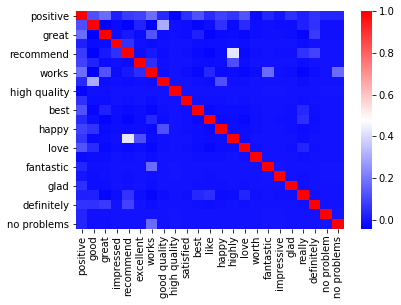

In [48]:
sns.heatmap(amazon.corr(), cmap='bwr')
plt.show()

The words 'highly' and 'recommend' correlate decently together, but for the most part the words are not highly correlated with one another, which is good for the model.

In [10]:
#defining our features and our target result (positive reviewsfor key in keywords:
data = amazon.iloc[:, 2:]
target = amazon['positive']

In [18]:
bnb = BernoulliNB()

bnb.fit(data, target)

target_pred = bnb.predict(data)

print('Number of mislabeled points out of a total {} points : {}'.format(
    data.shape[0], (target != target_pred).sum()))
print('Success Rate: {}'.format((data.shape[0] - (target != target_pred).sum())/(data.shape[0])))

Number of mislabeled points out of a total 1000 points : 348
Success Rate: 0.652


The feature engineering for this model was pretty straightforward. The goal was to look for positive words in the Amazon reviews and try to predict if the review was positive based on the occurrence of those words. I only allowed features into the model that were present in the reviews.

In the end I could only get the model down to 348 mislabeled points. This isn't very strong from my perspective and could possible be made better if there was some information from the source data on what type of products the reviews were pulled from. Common identifier words would help to make the model better from this point. As I added more features, they were really only taking off one point at a time so I decided to stop adding keywords and call the model done.

Next I will use a precision, recall, and cross_val_score to evaluate the classifier's performance.

In [95]:
print(classification_report(target, target_pred, target_names=['Positive', 'Negative']))
print('\nCross Validation Scores: \n{}'.format(cross_val_score(bnb, data, target, cv=10)))

              precision    recall  f1-score   support

    Positive       0.60      0.93      0.73       500
    Negative       0.85      0.37      0.52       500

   micro avg       0.65      0.65      0.65      1000
   macro avg       0.72      0.65      0.62      1000
weighted avg       0.72      0.65      0.62      1000


Cross Validation Scores: 
[0.66 0.63 0.66 0.63 0.67 0.63 0.65 0.59 0.68 0.6 ]


A ten fold cross validation matrix doesnt show any fold overfitting compared to another. The scores are generally the same. However, our precision is very low and we need to cross validate with more folds considering our large number of features. 

In [33]:
print('Cross Validation Scores:\n{}'.format(cross_val_score(bnb, data, target, cv=23)))
print('\nMean Cross Validation Score: {}'.format(cross_val_score(bnb, data, target, cv=23).mean()))

Cross Validation Scores:
[0.65909091 0.63636364 0.59090909 0.63636364 0.68181818 0.65909091
 0.61363636 0.68181818 0.63636364 0.59090909 0.75       0.59090909
 0.59090909 0.65909091 0.68181818 0.63636364 0.63636364 0.61904762
 0.69047619 0.64285714 0.5952381  0.61904762 0.61904762]

Mean Cross Validation Score: 0.6398927159796723


The 23 fold cross validation matrix (# folds = # classifiers) does show one fold overfitting when compared to one another. This could be due to the high degree of correlation between the 'highly' class and 'recommend' class. For the next iteration I will combine those two into one class and try to add some more words so that we can get a little better at predicting the positive reviews. Right now our precision at 0.37 is pretty low.

In [35]:
link = 'amazon_cells_labelled.txt'
amazon2 = pd.read_csv(link, delimiter='\t', header=None)
#positive column is binary (1 for True, 0 for False)
amazon2.columns = ['review', 'positive']

In [59]:
#Iteration 2 of the classifiers and model
keywords2 = [
    'good',  
    'great', 
    'impressed', 
    'excellent',  
    'works', 
    'good quality', 
    'high quality',
    'satisfied', 
    'best', 
    'like',
    'happy', 
    'highly recommend', 
    'love', 
    'worth', 
    'works', 
    'fantastic',  
    'impressive',
    'glad', 
    'really', 
    'definitely', 
    'no problem', 
    'no problems', 
    'easy', 
    'pleasantly', 
    'simple', 
    'worthwhile',
    'bargain..',  
    'convenient', 
    'smoother',
    'Great'
]

for key in keywords2:
    amazon2[str(key)] = amazon2.review.str.contains(
        " " + str(key) + " ", case=False)

In [63]:
amazon2.drop('Perfect', axis=1, inplace=True)

In [46]:
amazon2['positive'] = (amazon2['positive'] == 1)

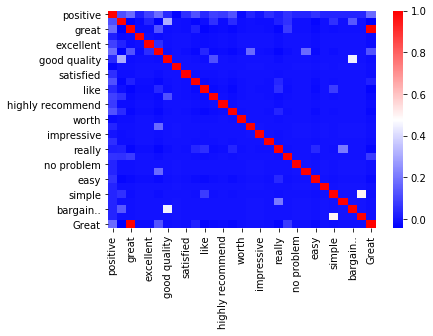

Number of mislabeled points out of a total 1000 points : 345
              precision    recall  f1-score   support

    Positive       0.60      0.94      0.73       500
    Negative       0.87      0.37      0.51       500

   micro avg       0.66      0.66      0.66      1000
   macro avg       0.73      0.66      0.62      1000
weighted avg       0.73      0.66      0.62      1000


Cross Validation Scores: 
[0.64 0.63 0.65 0.65 0.69 0.63 0.66 0.61 0.66 0.62]


In [93]:
sns.heatmap(amazon2.corr(), cmap='bwr')
plt.show()

data2 = amazon2.iloc[:, 2:]
target2 = amazon2['positive']

bnb.fit(data2, target2)
target_pred2 = bnb.predict(data2)
print('Number of mislabeled points out of a total {} points : {}'.format(
    data2.shape[0], (target2 != target_pred2).sum()))

print(classification_report(target2, target_pred2, target_names=['Positive', 'Negative']))
print('\nCross Validation Scores: \n{}'.format(cross_val_score(bnb, data2, target2, cv=10)))

Ok, so after combining 'highly recommend' and adding 8 new classifiers, the model has not improved much at all. Actually our Precision has gone down and our recall has increased. You can see in the confusion matrix that our True Negative cases have actually increased but our True Positive cases have decreased some. The additions to the model in iteration 2 seem to be helping us predict the negative reviews better, but have decreased our ability to predict positive reviews.

For the next iteration I think we could remove some of the features and retain the same precision and recall. Based on the correlations of each feature with the positive indicator there seem to be some classes that do not add much to the model. Let's remove any class that has less than a 0.1 correlation with the positive indicator

In [71]:
amazon2.corr()['positive']

positive            1.000000e+00
good                1.192962e-01
great               1.735368e-01
impressed           2.245066e-02
excellent           8.980265e-02
works               1.788624e-01
good quality        4.253287e-02
high quality       -3.163860e-02
satisfied           5.485460e-02
best                1.234035e-01
like                4.171473e-02
happy               9.183979e-02
highly recommend    7.769310e-02
love                1.275153e-01
worth              -1.828487e-02
fantastic           3.163860e-02
impressive         -3.106276e-19
glad                5.485460e-02
really              2.001290e-02
definitely          6.337243e-02
no problem          3.163860e-02
no problems         3.163860e-02
easy                6.179706e-02
pleasantly          3.163860e-02
simple              3.168621e-02
worthwhile          3.163860e-02
bargain..           3.163860e-02
convenient          3.163860e-02
Great               1.735368e-01
Name: positive, dtype: float64

In [72]:
amazon3 = pd.read_csv(link, delimiter='\t', header=None)
#positive column is binary (1 for True, 0 for False)
amazon3.columns = ['review', 'positive']

In [77]:
#Iteration 2 of the classifiers and model
keywords3 = [
    'good',  
    'great',   
    'works',  
    'best',  
    'love'
]

for key in keywords3:
    amazon3[str(key)] = amazon3.review.str.contains(
        " " + str(key) + " ", case=False)

In [79]:
amazon3.drop('Great', axis=1, inplace=True)

In [75]:
amazon3['positive'] = (amazon3['positive'] == 1)

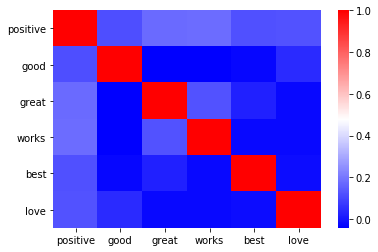

Number of mislabeled points out of a total 1000 points : 389
              precision    recall  f1-score   support

    Positive       0.56      0.97      0.71       500
    Negative       0.91      0.25      0.39       500

   micro avg       0.61      0.61      0.61      1000
   macro avg       0.73      0.61      0.55      1000
weighted avg       0.73      0.61      0.55      1000


Cross Validation Scores: 
[0.625      0.63095238 0.62048193 0.58433735 0.64457831 0.56024096]


In [94]:
sns.heatmap(amazon3.corr(), cmap='bwr')
plt.show()

data3 = amazon3.iloc[:, 2:]
target3 = amazon3['positive']

bnb.fit(data3, target3)
target_pred3 = bnb.predict(data3)
print('Number of mislabeled points out of a total {} points : {}'.format(
    data3.shape[0], (target3 != target_pred3).sum()))


print(classification_report(target3, target_pred3, target_names=['Positive', 'Negative']))
print('\nCross Validation Scores: \n{}'.format(cross_val_score(bnb, data3, target3, cv=6)))

Removing all of the classes did hurt the model. Precision has come down to 0.56 from 0.60, but the recall has come up. Limiting the number of classes has helped us recognize negative reviews, but definitely taken away our ability to predict positive reviews. Although the model did perform worse than the previous one, it does seem that these core 6 classifiers are some of the most important for predicting positivity.

At this stage it still does not seem like any of the features are overfitting the model. The spread in cross validation scores is likely due to the limited number of rows in the dataset and the removal of data during the test and train process of the stratified k-fold algorithm.

For the next iteration, I want try using a compiled positive word list from publication. The following list comes from the following papers:

Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 
       Proceedings of the ACM SIGKDD International Conference on Knowledge 
       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
       Washington, USA, 
Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing 
       and Comparing Opinions on the Web." Proceedings of the 14th 
       International World Wide Web conference (WWW-2005), May 10-14, 
       2005, Chiba, Japan.

In [111]:
amazon4 = pd.read_csv(link, delimiter='\t', header=None)
#positive column is binary (1 for True, 0 for False)
amazon4.columns = ['review', 'positive']
amazon4.head(5)

,review,positive
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [112]:
pos_words_link = 'positive_words.txt'
positive_words = pd.read_csv(pos_words_link, delimiter='\n', header=None)
positive_words.columns = ['pos_words']

for key in positive_words['pos_words']:
    amazon4[str(key)] = amazon4.review.str.contains(
        " " + str(key) + " ", case=False)

amazon4.head(5)

,review,positive,a+,abound,abounds,abundance,abundant,accessable,accessible,acclaim,...,wow,wowed,wowing,wows,yay,youthful,zeal,zenith,zest,zippy
0,So there is no way for me to plug it in here i...,0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [113]:
amazon3['positive'] = (amazon3['positive'] == 1)

In [114]:
#sns.heatmap(amazon4.corr(), cmap='bwr')
#plt.show()

data4 = amazon4.iloc[:, 2:]
target4 = amazon4['positive']

bnb.fit(data4, target4)
target_pred4 = bnb.predict(data4)
print('Number of mislabeled points out of a total {} points : {}'.format(
    data4.shape[0], (target4 != target_pred4).sum()))


print(classification_report(target4, target_pred4, target_names=['Positive', 'Negative']))
print('\nCross Validation Scores: \n{}'.format(cross_val_score(bnb, data4, target4, cv=6)))

Number of mislabeled points out of a total 1000 points : 272
              precision    recall  f1-score   support

    Positive       0.66      0.94      0.78       500
    Negative       0.90      0.51      0.65       500

   micro avg       0.73      0.73      0.73      1000
   macro avg       0.78      0.73      0.71      1000
weighted avg       0.78      0.73      0.71      1000


Cross Validation Scores: 
[0.69642857 0.66666667 0.71686747 0.65060241 0.69879518 0.65662651]


So moving our number of features from 23 to 2007 has only increased our precision to 0.66. Our cross validation looks like it is more tightly grouped, ranging from 0.66-0.72, and overall the model has only slightly improved. The f1-score and recall for the Negative class has jumped quite a lot, which makes me feel better that the model is doing a better job for that case. There could be some poisoning going on in this iteration, where some of the positive words from the list could be tied to negative reviews, which would bring down the predictive capabilities of the model.

In [117]:
print(confusion_matrix(target, target_pred))
print(confusion_matrix(target4, target_pred4))

[[467  33]
 [315 185]]
[[472  28]
 [244 256]]


### Conclusions and Question Wrap-Up

For all fo the iterations there did not seem to be an classifiers that overfit the model. I think the class balance that was present in the dataset from the beginning had something to do with this. Also, since the reviews were not from one product, there wasn't one particular word that was more associated with positive reviews than another.

The model still seemed to do a better job predicting the negative reviews instead of the positive, even though there was no class imbalance in the dataset (i.e. equal positive and negative reviews). The precision for the negative class was the highest in all iterations of the model.

The performance of the model did not seem to be impacted by any one feature, however it did seem to benefit from the volume of features. By increasing the feature list to 2000+ I was able to increase the True Positive cases from 185-256 with very little fluctuation in the True Negative cases (467-472) from the first iteration to the last.